In [1]:
import Pkg
Pkg.activate(".")
Pkg.add(["Random","LinearAlgebra","FFTW","Plots"])
using FFTW, Plots

  Activating new project at `~/Documents/programming/BME-574-2024-homeworks/HW2`
    Updating registry at `~/.julia/registries/General.toml`
    Updating registry at `~/.julia/registries/JSMLComponents.toml`
    Updating registry at `~/.julia/registries/JuliaComputingRegistry.toml`
    Updating registry at `~/.julia/registries/JuliaHubRegistry.toml`
   Resolving package versions...
   Installed XZ_jll ───── v5.6.3+0
   Installed PlotThemes ─ v3.3.0
   Installed HTTP ─────── v1.10.9
    Updating `~/Documents/programming/BME-574-2024-homeworks/HW2/Project.toml`
  [7a1cc6ca] + FFTW v1.8.0
  [91a5bcdd] + Plots v1.40.8
  [37e2e46d] + LinearAlgebra
  [9a3f8284] + Random
    Updating `~/Documents/programming/BME-574-2024-homeworks/HW2/Manifest.toml`
  [621f4979] + AbstractFFTs v1.5.0
  [d1d4a3ce] + BitFlags v0.1.9
  [944b1d66] + CodecZlib v0.7.6
  [35d6a980] + ColorSchemes v3.27.0
⌅ [3da002f7] + ColorTypes v0.11.5
  [c3611d14] + ColorVectorSpace v0.10.0
⌅ [5ae59095] + Colors v0.12.11
  [34da2

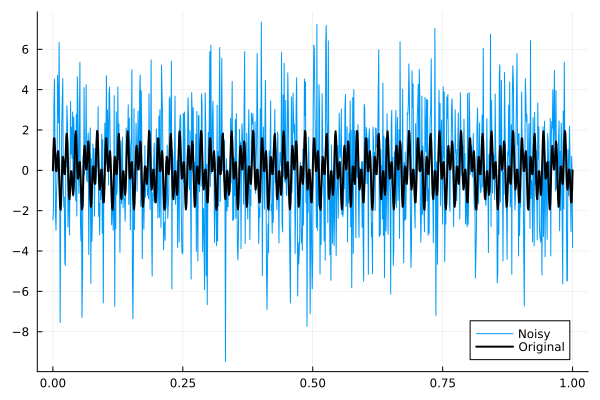

In [2]:
dt = 0.001
t = 0:dt:1.0
f = sin.(2 .* π .* 50 .* t) .+ sin.(2 .* π .* 120 .* t) # sum of two frequencies
fnoise = f .+ 2.5.*randn(size(f))# add noise
plot(t,fnoise,label="Noisy")
plot!(t,f, lw=2, lc=:black,label="Original")

In [3]:
n = length(t)
fhat = rfft(fnoise)
PSD = abs2.(fhat)./n#power spectrum. 'abs2' better for complex and includes conj. step
freq = rfftfreq(n,1/dt)
#freq = 1 ./ (dt.*n) .* (0:(n-1))#x axis of frequencies
#L = round.(Int,1:1:(floor(n/2)+1))#first half only taken care of using rfft


501-element Frequencies{Float64}:
   0.0
   0.999000999000999
   1.998001998001998
   2.997002997002997
   3.996003996003996
   4.9950049950049955
   5.994005994005994
   6.993006993006993
   7.992007992007992
   8.991008991008991
   9.990009990009991
  10.989010989010989
  11.988011988011989
   ⋮
 488.51148851148855
 489.51048951048955
 490.50949050949055
 491.50849150849155
 492.50749250749254
 493.50649350649354
 494.50549450549454
 495.50449550449554
 496.50349650349654
 497.50249750249753
 498.50149850149853
 499.50049950049953

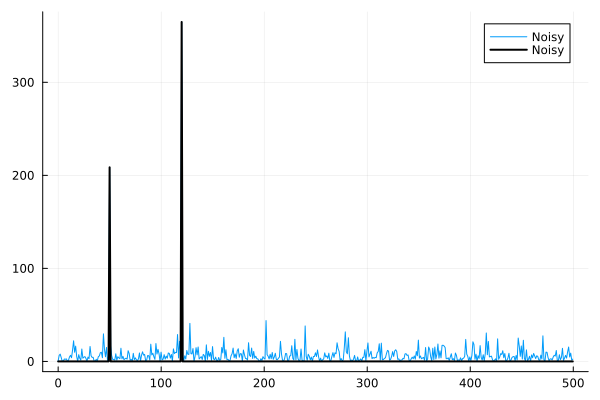

In [4]:
inds = 100 .< PSD
PSDclean = PSD .* inds

plot(freq,PSD,label="Noisy")
plot!(freq,PSDclean,lw=2,lc=:black,label="Noisy")

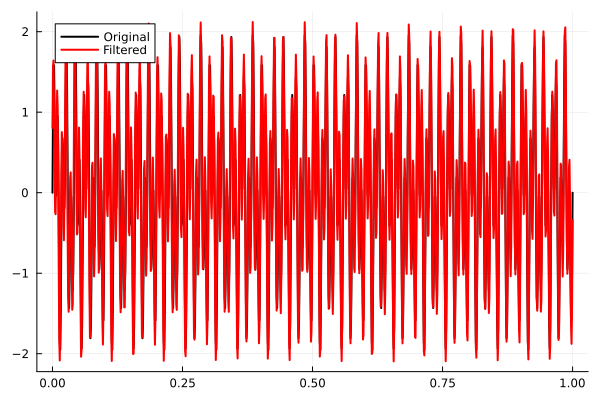

In [6]:
freqfilt = fhat.*inds
ffilt = irfft(freqfilt,n)

#plot(t,fnoise,label="Noisy")
plot(t,f, lw=2, lc=:black,label="Original")
plot!(t,ffilt, lw=2, lc=:red,label="Filtered")